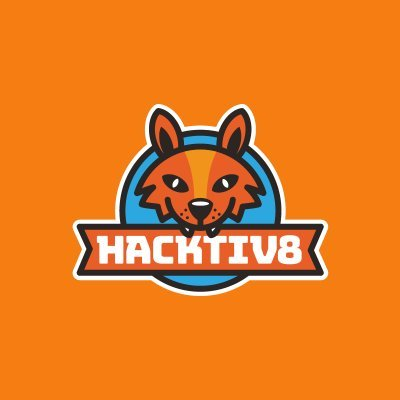

# FINAL PROJECT 4 HACKTIV8

**Anggota:**\
**1. JOHNSON ROUSLIE JUNIOR - PYTN_KS09_003**\
**2. STEPHANIE MARCELINE RAINTUNG - PYTN_KS09_017**\
**3. PUTRI ALTIKA SARI - PYTN_KS09_020**

# A. Introduction
- Jumlah dataset : Terdapat 8950 baris dan 18 kolom
- Sumber Dataset : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/code
- Tujuannya: Menentukan strategi pemasaran yang tepat.


## 1. Latar Belakang

Dataset ini digunakan untuk melakukan segmentasi konsumen sehingga divisi marketing bisa menerapkan strategi marketing yang tepat berdasarkan data yang diperoleh dari penggunaan 9000 kartu kredit konsumen selama 6 bulan.

## 2. Informasi Atribut

1. CUSTID : Identifikasi pemegang Kartu Kredit (Kategorical).
2. SALDO : Saldo jumlah yang tersisa di akun.
3. BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PEMBELIAN : Jumlah pembelian yang dilakukan dari akun.
5. ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. PEMBELIAN ANGSURAN : Jumlah pembelian yang dilakukan secara angsuran
7. CASHADVANCE : Uang muka yang diberikan oleh pengguna
8. FREKUENSI PEMBELIAN : Seberapa sering Pembelian dilakukan (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. FRREKUENSI PEMBELIAN PEMBELIAN : Seberapa sering pembelian dengan cara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayarkan
12. CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
13. PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan
14. CREDIT_LIMIT : Batas nominal kredit yang diberikan
15. PEMBAYARAN : Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE : Masa berlaku layanan kartu kredit bagi pengguna

# B. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

# C. Data Loading 
Pada Tahap Data Loading, hal yang dilakukan adalah :
- Mengimpor dataset
- Menampilkan dataset
- Melihat jumlah baris dan kolom
- Melihat informasi tiap variabel

In [2]:
df = pd.read_csv("credit_card.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

Terdapat 8950 baris dan 18 kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# D. Data Cleaning
Pada tahap data cleaning, hal yang dilakukan adalah :
- Mengecek missing value
- Cek duplikasi data

In [7]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

Terdapat missing value di variabel **MINIMUM_PAYMENTS** dan **CREDIT_LIMIT**. Sehingga kami mengatasi missing value yang ada dengan menggantinya dengan nilai rata-rata yang ada pada tiap data variabel.

In [8]:
# Mengganti nilai yang hilang di kolom MINIMUM_PAYMENTS dengan rata-rata kolom
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace = True)

In [9]:
# Mengganti nilai yang hilang di kolom CREDIT_LIMIT dengan rata-rata kolom
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()), inplace = True)

In [10]:
df.isnull().sum().any()

False

Setelah di cek kembali, **sudah tidak terdapat missing value**.

In [11]:
df.duplicated().any()

False

Tidak ada data yang **terduplikat**.

Variabel CUST_ID merupakan ID yang dimiliki oleh customer sebagai identitas customer tersebut. Variabel CUST_ID tidak dibutuhkan dalam analisis data sehingga Kami **Menghapus variabel CUST_ID**.

In [12]:
df = df.drop(['CUST_ID'],axis = 1)
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# E. Data Exploration
Dalam Data Exploration, kami melakukan beberapa analisis seperti : Analisis Masa Berlaku (TENURE), Analisis Saldo (Balance), Analisis Pembelian (Purchase), Analisis Pembayaran (Payment).

**Mengubah variabel numerik** menjadi **categorical** untuk mempermudah penyampaian interpretasi dalam analisis dan visualisasi data

In [13]:
# mengubah data numerik menjadi categorical
df_eda = pd.DataFrame()

df_eda["BALANCE_FREQUENCY"] = np.where(df["BALANCE_FREQUENCY"] < 1, "not frequently updated", "frequently updated")
df_eda["PURCHASES_FREQUENCY"] = np.where(df["PURCHASES_FREQUENCY"] < 1, "not frequently purchased", "frequently purchased")
df_eda["ONEOFF_PURCHASES_FREQUENCY"] = np.where(df["ONEOFF_PURCHASES_FREQUENCY"] < 1, "not frequently purchased", "frequently purchased")
df_eda["PURCHASES_INSTALLMENTS_FREQUENCY"] = np.where(df["PURCHASES_INSTALLMENTS_FREQUENCY"] < 1, "not frequently done", "frequently done")
df_eda["CASH_ADVANCE_FREQUENCY"] = np.where(df["CASH_ADVANCE_FREQUENCY"] < 1, "not often", "often")

df_eda.head(3)

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
1,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
2,frequently updated,frequently purchased,frequently purchased,not frequently done,not often


## 1. Analisis Masa Berlaku (TENURE)

### 1.A. Total Masa berlaku kartu kredit (TENURE) customer tertinggi berapa bulan?**

In [14]:
# Melihat masa berlaku layanan kartu kredit
tenure_distr = df.groupby("TENURE").size().sort_values(ascending = False)
tenure_distr

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

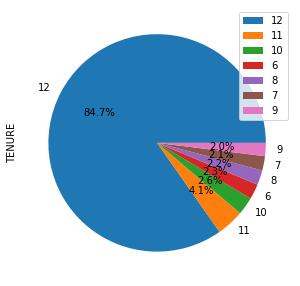

In [15]:
tenure=pd.DataFrame(df['TENURE'].value_counts())
plot = tenure.plot.pie(y='TENURE', figsize=(8, 5), autopct="%1.1f%%");

**Interpretasi**

Masa berlaku kartu kredit (TENURE) yang dimiliki customer (TENURE) tertinggi yaitu **12 bulan**, dengan persentase 84.7%.

## 2. Analisis Saldo

### 2.A. Seberapa sering saldo (BALANCE_FREQUENCY) customer diperbarui?

In [16]:
balance_freq = df_eda["BALANCE_FREQUENCY"].value_counts(normalize=True)*100

In [17]:
balance_freq

frequently updated        69.396648
not frequently updated    30.603352
Name: BALANCE_FREQUENCY, dtype: float64

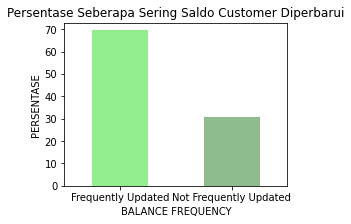

In [18]:
balance_freq.plot(kind='bar', figsize=(4,3), color=['lightgreen','darkseagreen'])

plt.title('Persentase Seberapa Sering Saldo Customer Diperbarui')
plt.xlabel('BALANCE FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Frequently Updated", "Not Frequently Updated"], rotation="horizontal")

plt.show()

**Interpretasi**

Berdasarkan visualisasi data diatas, persentase saldo customer yang sering diperbarui **(frequently updated)** ada **69.39%** dan persentase saldo customer yang tidak sering diperbarui **(not frequently updated)** ada **30.60%**. Sehingga bisa disimpulkan sebagian besar customer sering memperbarui saldo kartu kreditnya.

### 2.B. Saldo (Balance) min, max dan mean yang dimiliki customer?

In [19]:
# Saldo Tertinggi
balance_max = df["BALANCE"].max()
balance_max

19043.13856

In [20]:
# Saldo Terendah
balance_min = df["BALANCE"].min()
balance_min

0.0

In [21]:
# Saldo Rata-rata
balance_max = df["BALANCE"].mean()
balance_max

1564.4748276781038

## 3. Analisis Pembelian (Purchase)

### 3.A. Seberapa sering Pembelian (PURCHASES_FREQUENCY) yang dilakukan Customer ?

In [22]:
purchase_freq = df_eda["PURCHASES_FREQUENCY"].value_counts(normalize=True)*100

In [23]:
purchase_freq

not frequently purchased    75.664804
frequently purchased        24.335196
Name: PURCHASES_FREQUENCY, dtype: float64

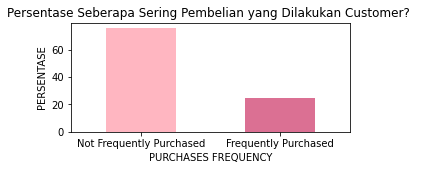

In [24]:
purchase_freq.plot(kind='bar', figsize=(5,2), color=['lightpink','palevioletred'])

plt.title('Persentase Seberapa Sering Pembelian yang Dilakukan Customer? ')
plt.xlabel('PURCHASES FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Frequently Purchased", "Frequently Purchased"], rotation="horizontal")

plt.show()

**Interpretasi**

Berdasarkan visualisasi data diatas, persentase customer yang sering melakukan pembelian **(frequently purchased)** ada **24.33%** dan persentase customer yang tidak sering melakukan pembelian **(not frequently purchased)** ada **75.66%**. Sehingga bisa disimpulkan sebagian besar customer tidak sering melakukan pembelian.

### 3.B. Seberapa sering Customer melakukan pembelian (ONE OFF PURCHASES FREQUENCY) dalam Sekali Jalan?

In [25]:
onepurchase_freq = df_eda["ONEOFF_PURCHASES_FREQUENCY"].value_counts(normalize=True)*100

In [26]:
onepurchase_freq

not frequently purchased    94.625698
frequently purchased         5.374302
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64

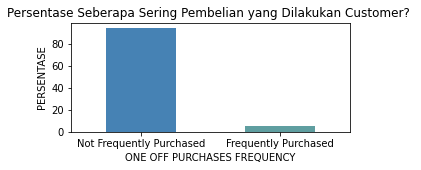

In [27]:
onepurchase_freq.plot(kind='bar', figsize=(5,2), color=['steelblue','cadetblue'])

plt.title('Persentase Seberapa Sering Pembelian yang Dilakukan Customer? ')
plt.xlabel('ONE OFF PURCHASES FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Frequently Purchased", "Frequently Purchased"], rotation="horizontal")

plt.show()

**Interpretasi**

Berdasarkan visualisasi data diatas, persentase customer yang sering melakukan pembelian dalam sekali jalan **(frequently purchased)** ada **5.37%** dan persentase customer yang tidak sering melakukan pembelian dalam sekali jalan **(not frequently purchased)** ada **94.62%**. Sehingga bisa disimpulkan mayoritas customer tidak sering melakukan pembelian dalam sekali jalan.

### 3.C. Seberapa sering pembelian (PURCHASES INSTALLMENTS FREQUENCY) yang dilakukan Customer dengan Cicilan?

In [28]:
purchases_installments_freq = df_eda["PURCHASES_INSTALLMENTS_FREQUENCY"].value_counts(normalize=True)*100

In [29]:
purchases_installments_freq

not frequently done    85.128492
frequently done        14.871508
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64

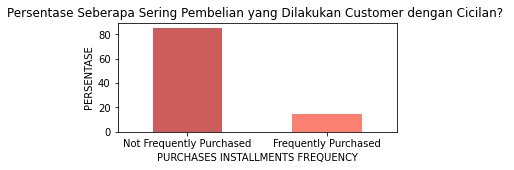

In [30]:
purchases_installments_freq.plot(kind='bar', figsize=(5,2), color=['indianred','salmon'])

plt.title('Persentase Seberapa Sering Pembelian yang Dilakukan Customer dengan Cicilan? ')
plt.xlabel('PURCHASES INSTALLMENTS FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Frequently Purchased", "Frequently Purchased"], rotation="horizontal")

plt.show()

**Interpretasi**

Berdasarkan visualisasi data diatas, persentase customer yang sering melakukan pembelian dengan Cicilan **(frequently purchased)** ada **14.87%** dan persentase customer yang tidak sering melakukan pembelian dengan Cicilan **(not frequently purchased)** ada **85.12%**. Sehingga dapat disimpulkan sebagian besar customer tidak sering melakukan pembelian dengan cicilan.

## 4. Analisis Pembayaran (Payment)

### 4.A. Seberapa sering customer membayar uang muka (CASH ADVANCE FREQUENCY)?

In [31]:
cash_advance_freq = df_eda["CASH_ADVANCE_FREQUENCY"].value_counts(normalize=True)*100

In [32]:
cash_advance_freq

not often    99.631285
often         0.368715
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

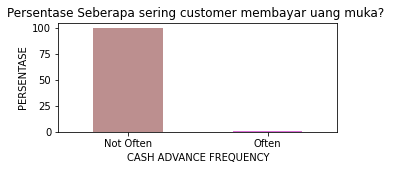

In [33]:
cash_advance_freq.plot(kind='bar', figsize=(5,2), color=['rosybrown','orchid'])

plt.title('Persentase Seberapa sering customer membayar uang muka? ')
plt.xlabel('CASH ADVANCE FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Often", "Often"], rotation="horizontal")

plt.show()

**Interpretasi**

Berdasarkan visualisasi data diatas, persentase customer yang sering membayar uang muka **(often)** ada **0.3%** dan persentase customer yang tidak sering membayar uang muka **(not often)** ada **99.63%**. Sehingga bisa disimpulkan mayoritas customer tidak sering membayar uang muka.

## 5. Outlier
**Membuat fungsi diagnostic_plot untuk mendeteksi outlier pada tiap fitur**

In [34]:
def diagnostic_plot(df, col, name):
    kurtosis = ["Kurtosis : {}".format(stats.kurtosis(df[col], axis=0, bias=True))]
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], bins=10, kde=True, alpha=0.5)
    plt.title('Histogram')
    plt.legend(labels=kurtosis, prop={'size': 8})
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[col])
    plt.title('Boxplot')
    
    plt.suptitle('Outlier of {}'.format(name))
    plt.show()

**Visualisasi Outlier**

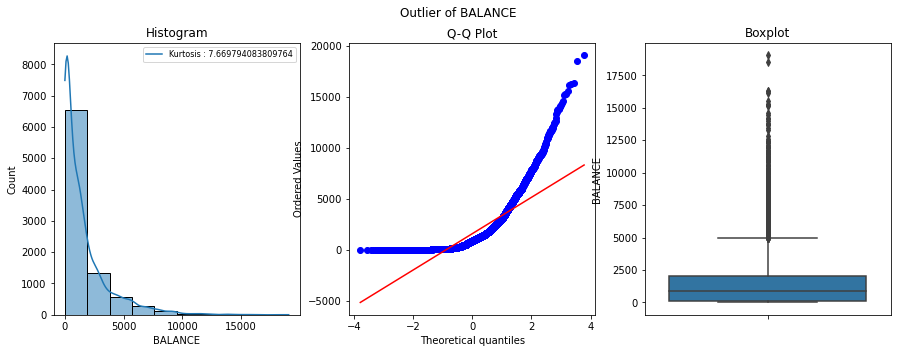

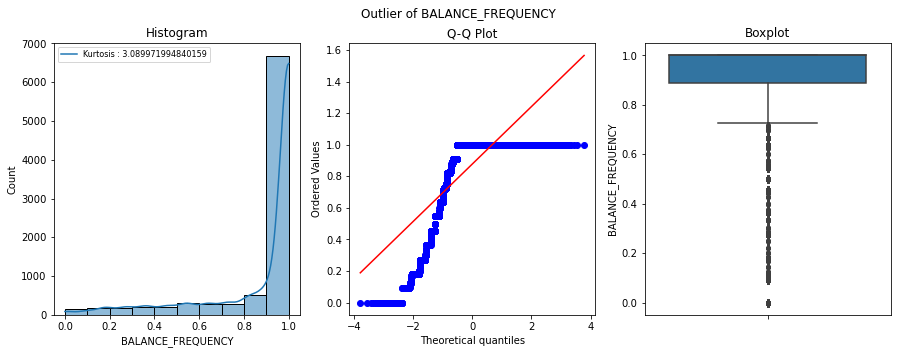

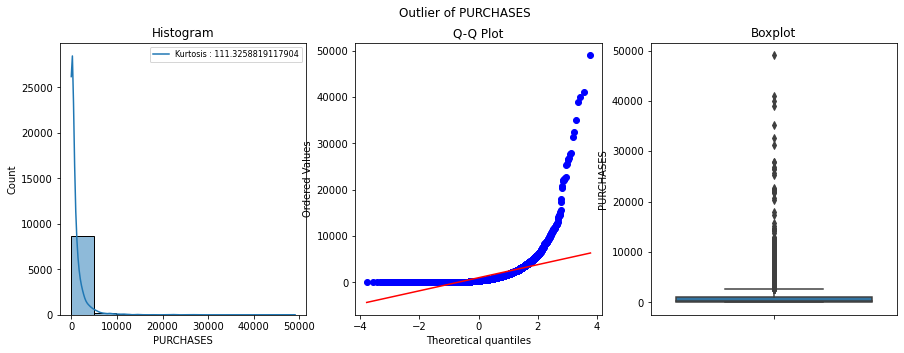

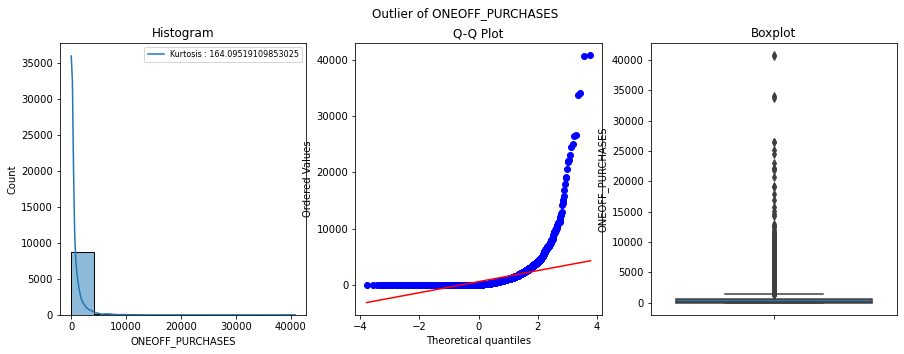

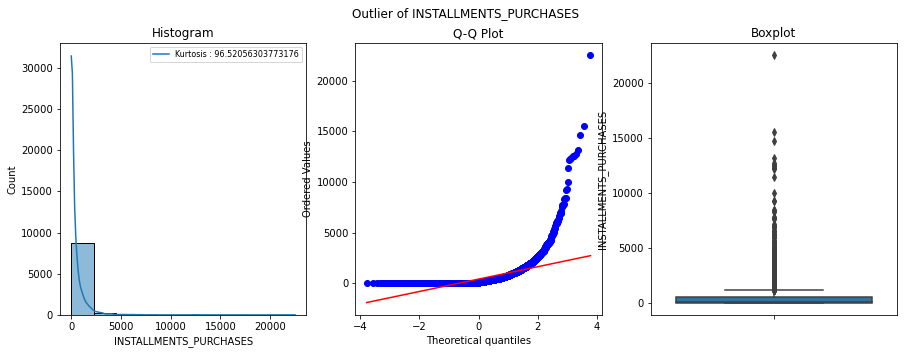

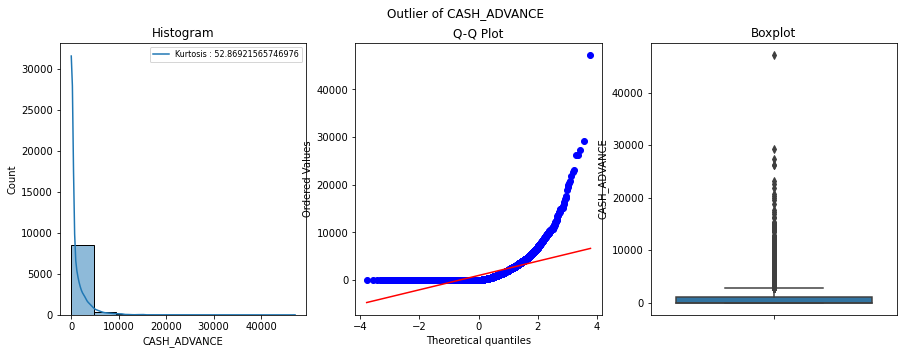

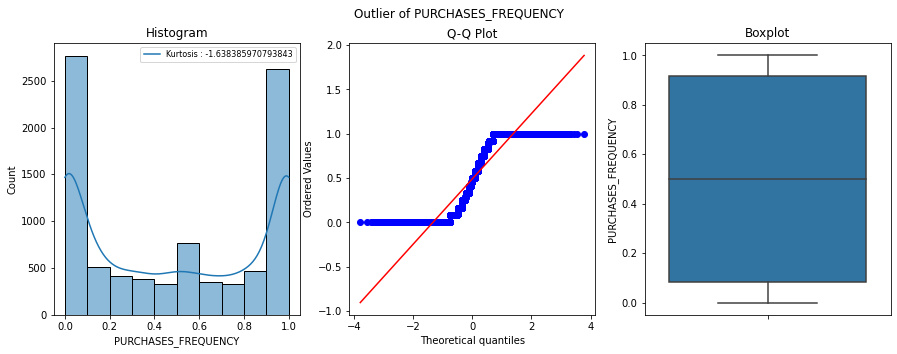

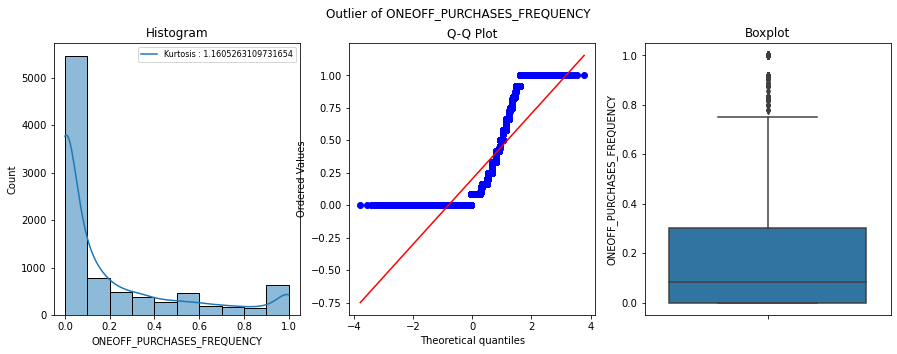

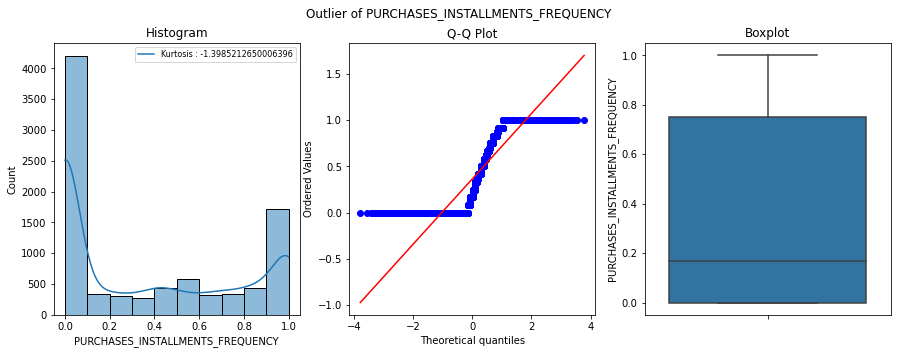

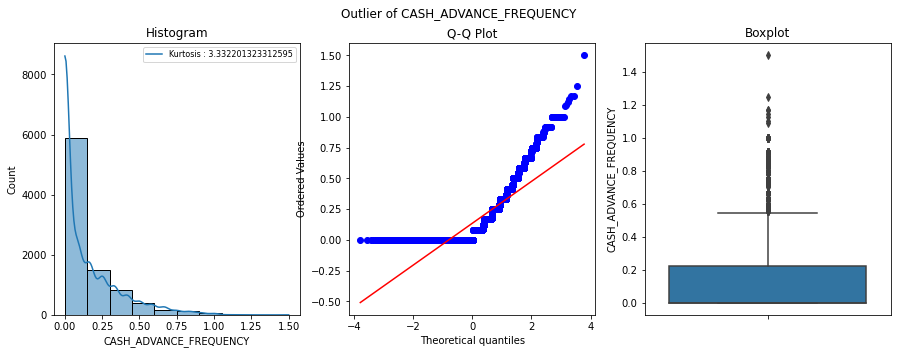

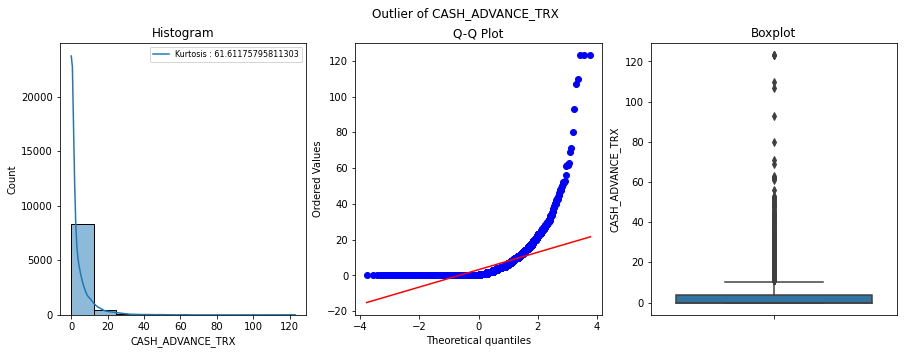

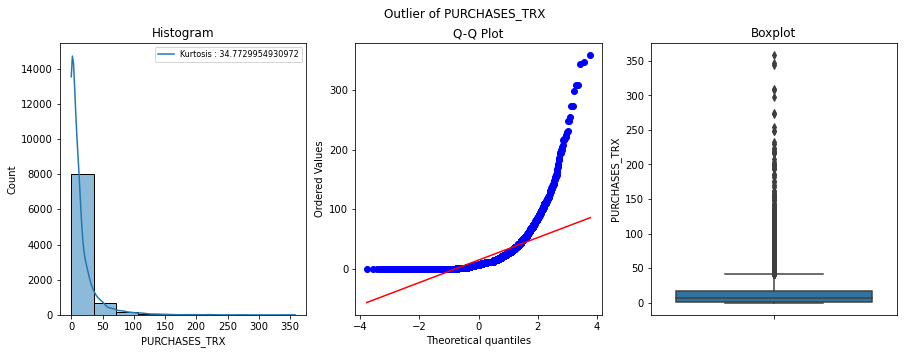

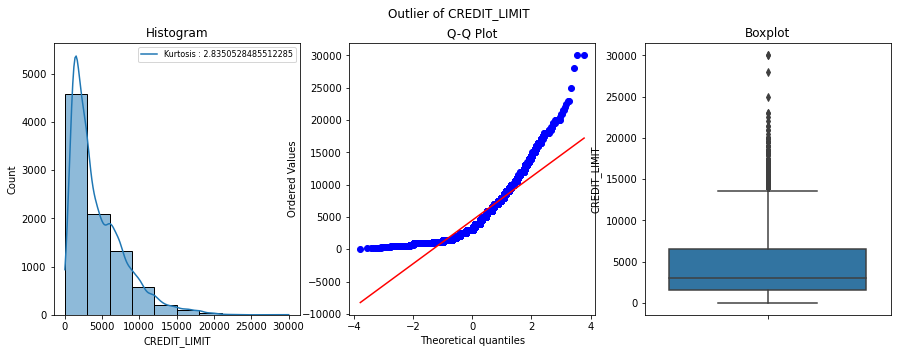

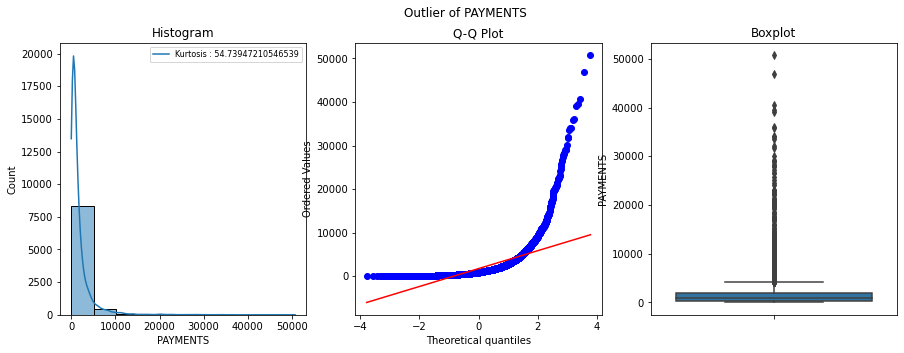

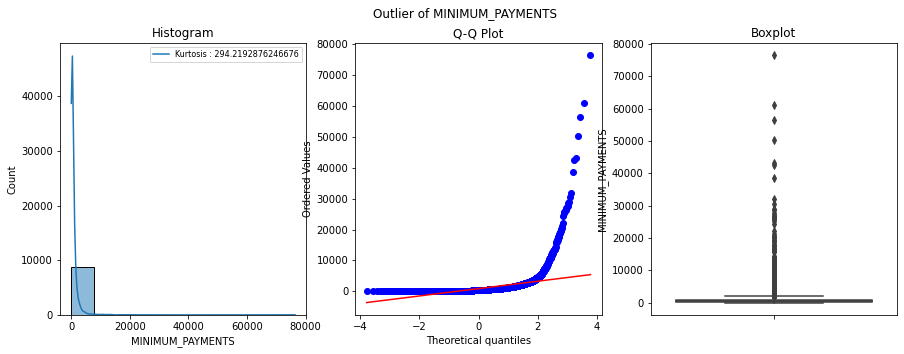

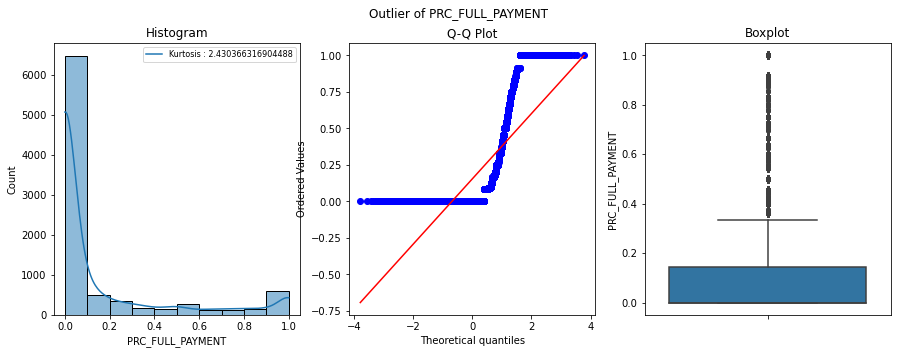

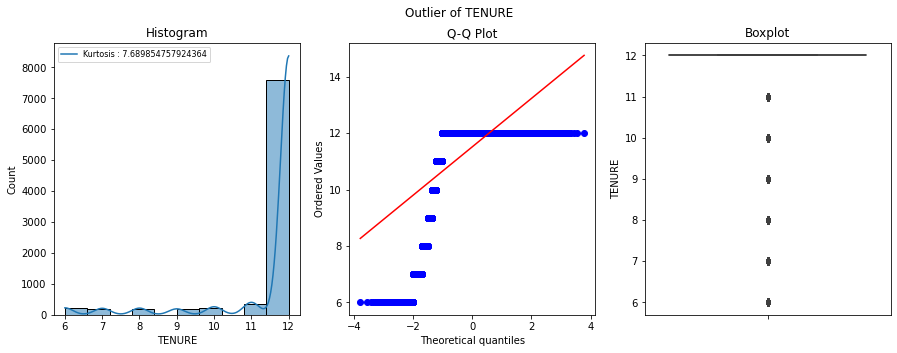

In [35]:
for col in df.columns:
    diagnostic_plot(df, col, col)

**Interpretasi**<br/>
1. Rata - rata fitur merupakan right-skew
2. Outlier banyak dikarenakan cara penggunaan kartu kredit setiap pengguna berbeda-beda misalnya pada fitur BALANCE yang tentunya ada pengguna yang memiliki saldo diatas rata - rata.
3. Outlier tidak dihapus agar anomali ini bisa ikut disegmentasikan dan tahu pengguna ini masuk ke segmen apa.

## 6. Korelasi

**Visualisasi Korelasi Secara Keseluruhan**

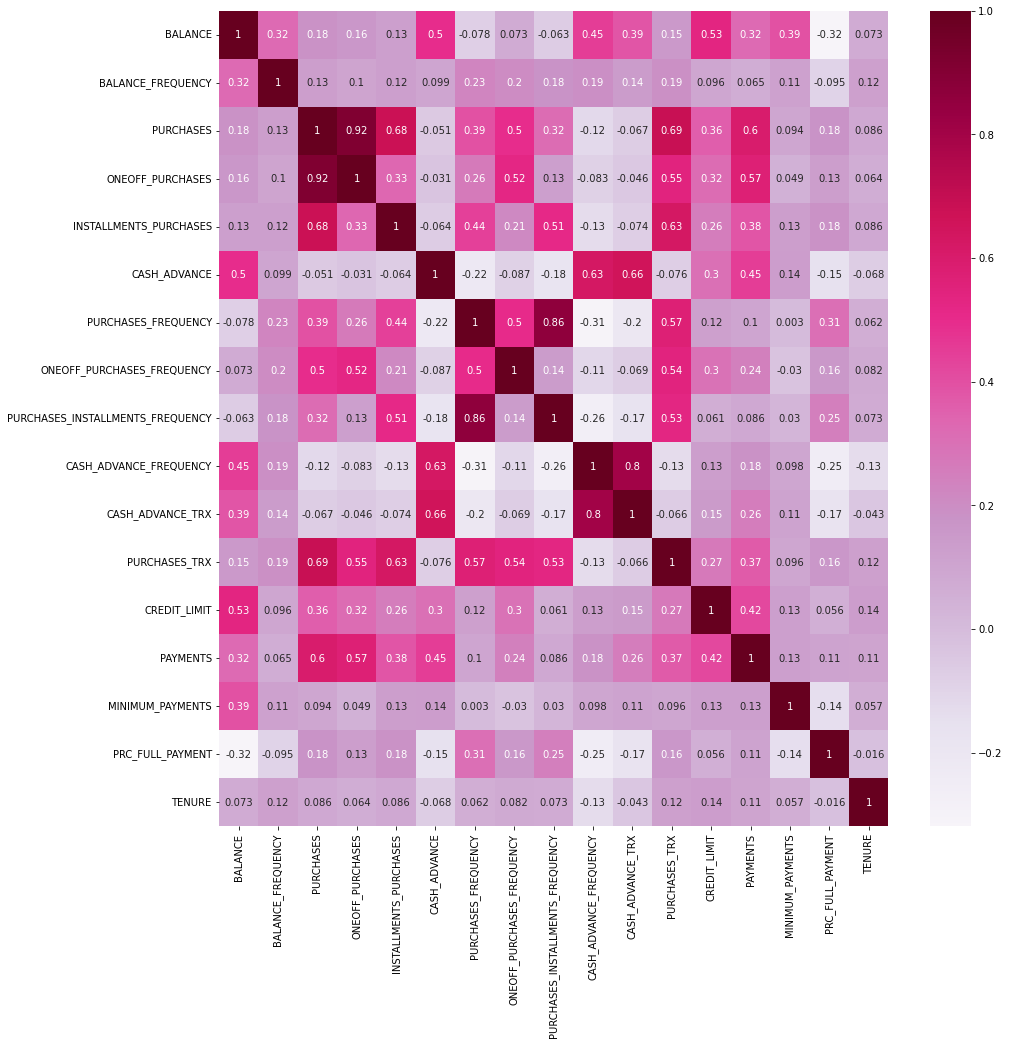

In [36]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

**Interpretasi :**

Beberapa variabel memiliki nilai korelasi sedang hingga tinggi terhadap variabel lain. Contoh variabel **korelasi tinggi** adalah **PURCHASES** dengan **ONE_OFF_PURCHASES**, dengan nilai korelasi **0,92**. Contoh lain adalah **CASH_ADVANCE_TRX** dengan **CASH_ADVANCE_FREQUENCY** dengan nilai korelasi **0,8**.

# F. Preprocessing
**Melakukan normalisasi pada inputtan**

In [37]:
X = np.asarray(df)
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

# G. Modelling

**Membuat Elbow**

Elbow method adalah metode yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.

In [ ]:
n = 20
inertias=[]
silhouette_scores=[]
for i in range(1,n):
    models= KMeans(i)
    models.fit(X)
    inertias.append(models.inertia_)
    if(i > 1):
        silhouette_scores.append(silhouette_score(X, models.fit_predict(X)))
plt.plot(inertias, 'rx-')

Jika dilihat posisi elbow disekitaran n=3 sampai n=8. Oleh sebab itu digunakan silhouette_score untuk memastikan posisi elbow yang tepat.

In [ ]:
k = [3,4,5,6,7,8]
plt.plot(k, [silhouette_scores[i] for i in range(1,7)], "bo-")
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Silhouette score pada n=3 lebih tinggi dibandingkan lainnya, oleh sebab itu akan digunakan cluster n=3.

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)

**Menggunakan PCA untuk mengubah data menjadi 2D untuk visualisasi**

In [ ]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

**Visualisasi**

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
plt.scatter(x, y, c = model.fit_predict(X)) 
plt.show()

**Kesimpulan**

1. Silhouette Score 0.25 yang artinya model melakukan segmentasi dengan perbedaan yang minim.
2. Warna hijau lebih dominan dibanding warna lainnya.

## Kesimpulan :
1. Terdapat **missing value** di variabel **CREDIT_LIMIT (1 missing value)** dan **MINIMUM_PAYMENTS (313 missing value)**.
2. Beberapa variabel memiliki nilai korelasi sedang hingga tinggi terhadap variabel lain (>0,5 hingga 1). Contoh variabel **korelasi tinggi** adalah **PURCHASES** dengan **ONE_OFF_PURCHASES**, dengan nilai korelasi **0,92**. Contoh lain adalah **CASH_ADVANCE_TRX** dengan **CASH_ADVANCE_FREQUENCY** dengan nilai korelasi **0,8**.
3. Saat menggunakan kartu kredit, sebagian besar customer kartu kredit lebih memilih masa berlaku (Tenure) **12 bulan** dibandingkan opsi masa berlaku (Tenure) lainnya.
4. Persentase saldo customer yang sering diperbarui **(frequently updated)** ada **69.39%** dan persentase saldo customer yang tidak sering diperbarui **(not frequently updated)** ada **30.60%**. Sehingga bisa disimpulkan sebagian besar customer sering memperbarui saldo kartu kreditnya.
5. Rata-rata customer tidak menggunakan kartu kredit untuk **pembayaran satu kali** (ONE_OFF_PURCHASES) atau **pembayaran dengan cicilan** (PURCHASES_INSTALLMENT_FREQUENCY).